<a href="https://colab.research.google.com/github/pkaustubh4/BeijingTripAnalysis/blob/main/Analysis_of_Traffic_in_Beijing_with_Density_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement

To map out Beijing's trip density chart based on individual locations at different times

### Step 1: Importing data; Applying the Haversine function to calculate trip distances

The code imports several modules, including pandas, numpy, and matplotlib.pyplot. It also sets up the
Jupyter Notebook to show the matplotlib plots inline.

The user is prompted to enter the location of a CSV file, and the pandas library is used to load the file
into a dataframe. The dataframe is then modified to convert the altitude column to numeric values.

The code defines a function that calculates the total distance travelled by an individual. The function
uses the haversine formula to calculate the distance between two points on the Earth's surface given
their latitude, longitude, and altitude. The function then loops through each trajectory recorded for the
specified individual and calculates the total distance travelled by that individual.

The user is prompted to enter an individual ID, and the function is called to calculate the total distance
travelled by that individual.

The total distances depend on the individual_id entered.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#1.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
# %matplotlib inline


#loading dataset
df = pd.read_csv("/content/drive/MyDrive/combined_trajectories.csv")
df["altitude"] = pd.to_numeric(df["altitude"])


def total_distance_travelled(df, uid):


  def haversine(lat1, lon1, lat2, lon2, alt1, alt2):

    R = 6371.0  #radius of the earth in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    h = R * c * 1000  #converting to meters
    d = np.sqrt(np.power(h, 2) + np.power((alt2 - alt1), 2))
    return d


  f = df[df.individual_id == uid].copy()

  t = 0
  if len(f)!=0:
    n = int(f.trajectory_id.iloc[-1])
    for i in range(n+1):
      y = f[f.trajectory_id == i].copy()
      if len(y) > 1:
          df_shifted = y.shift(periods=1, axis=0, fill_value=np.nan).copy()
          df_shifted["individual_id"] = y["individual_id"]  #restoring the individual ID column

          #applying the haversine function to the entire dataframe
          y["distance"] = haversine(y["latitude"], y["longitude"], df_shifted["latitude"], df_shifted["longitude"], y["altitude"], df_shifted["altitude"])

          #grouping the dataframe by individual ID and sum the distances
          t += np.sum(y.distance)

  return t


x = int(input("Please enter individual_id: "))
s3 = time.perf_counter()
p = total_distance_travelled(df, x)
st3 = time.perf_counter()

print("Total distance travelled:", p/1000, "km")
print("Runtime(excluding time taken to read csv file):", st3 - s3, "s")

Please enter individual_id: 4
Total distance travelled: 16931.699965477623 km
Runtime(excluding time taken to read csv file): 2.7160785659999647 s


### Step 2: Filtering out Beijing's trip data; Plotting density chart

The given code is used to create a density chart to visualize trip density for a specific area in Beijing.
The code imports the necessary modules such as "time", "pandas", "numpy", and "matplotlib.pyplot" to
complete this task.

The code first sets the value of the fourth timestamp before running the main function. The main
function filters out trips that occur in a specific latitude and longitude range using the "isin" function of
the pandas library. The filtered data is stored in a new dataframe called "d_ff".

Next, the code plots the filtered data using the "plot" function from matplotlib.pyplot. The plotted chart
is a 2D line plot with the x-axis showing latitude and the y-axis showing longitude. The chart's
background color is set to light yellow, and the plotted points' color and transparency are set to light
yellow and 0.7, respectively. Additionally, the chart's axes and title are labeled for clarity.

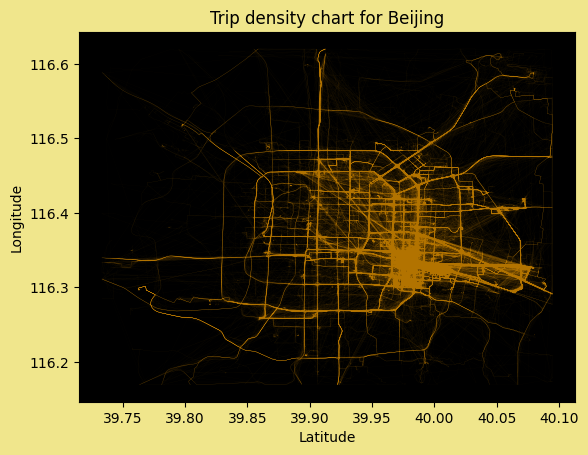

Runtime: 8.59656714700003 s


In [ ]:
#2.

s4 = time.perf_counter()
#filtering out trips in Beijing
d_f = df[df.latitude.isin(np.linspace(39.733, 40.095, num=362000).round(6))]
d_ff = d_f[d_f.longitude.isin(np.linspace(116.169, 116.620, num=451000).round(6))]

#plotting density chart
plt.figure(facecolor="#F0E68C")
plt.plot(d_ff.latitude, d_ff.longitude, linewidth = 0.01, alpha = 0.7, color = 'orange')
ax = plt.gca()
ax.set_facecolor('black')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Trip density chart for Beijing")

st4 = time.perf_counter()
plt.show()
print("Runtime:", st4-s4, "s")

### Future utilities of Data Science in GPS-tracking

One possible problem that can be addressed using GPS-tracking dataset is urban mobility analysis,
which aims to understand how people move and interact within a city. This information is crucial for
urban planning, transportation management, and public health, among other areas. Specifically, I would
like to investigate the temporal and spatial patterns of human mobility within a city, including the
frequency, duration, and distance of trips taken by different groups of people.

To address this problem, I would use a combination of descriptive and inferential statistics, data
visualization, and machine learning techniques. Firstly, I would perform exploratory data analysis (EDA)
to get an overview of the dataset and identify any outliers, missing values, or inconsistencies. Then, I
would use clustering algorithms to group individuals based on their mobility patterns, such as their
travel time, frequency, and destinations. This would allow me to identify different types of mobility
behavior and understand their characteristics and distribution.

Next, I would use statistical tests to analyze the differences between mobility patterns across different
demographic groups, such as age, gender, and income level. For example, I could use hypothesis testing
to determine whether there are significant differences in travel distance or duration between males and
females, or whether there are seasonal variations in mobility patterns.

To visualize the results of the analysis, I would use various techniques such as heat maps, scatter plots,
and network graphs. This would allow me to identify spatial and temporal hotspots of human mobility,
such as popular tourist destinations, business districts, or residential areas.

Finally, I would use predictive modeling to forecast future mobility patterns based on historical data.
This would enable me to identify potential congestion points, estimate the demand for public
transportation, and optimize the allocation of resources and services.

Overall, by applying a combination of statistical, visualization, and machine learning techniques to the
GPS-tracking dataset, I believe it is possible to gain valuable insights into the dynamics of human
mobility within a city. These insights could inform policy decisions, improve transportation planning, and
enhance the quality of life for urban residents.